# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
data_b=pd.read_csv(r"C:\Users\anshi\Downloads\5_b.csv")# nrows=2000)
data_a=pd.read_csv(r"C:\Users\anshi\Downloads\5_a.csv")#, nrows=2000)

In [3]:
def y_predict(df, y_prob, threshold):
    y_predicted=[]
    y_predicted=df.proba.apply(lambda x: 1 if x>=threshold else 0)
    return y_predicted

In [4]:
def confusion_matrix(data):
    TP, TN, FP, FN = 0,0,0,0
    
    for i in range(len(data)):
        if data.loc[i,"y"] == 1 and data.loc[i, "y_pred"]==1:
            TP+=1
        if data.loc[i,"y"] == 0 and data.loc[i, "y_pred"]==0:
            TN+=1
        if data.loc[i,"y"] == 0 and data.loc[i, "y_pred"]==1:
            FP+=1        
        if data.loc[i,"y"] == 1 and data.loc[i, "y_pred"]==0:
            FN+=1
    return {'tp':TP,'tn':TN,'fn':FN,'fp':FP}

In [5]:
def auc(df,prob):
    s = df['y'].value_counts()
    P = s[1]
    N = s[0]
    tpr = []
    fpr = []
    for i in tqdm(prob):
        df['y_pred']=y_predict(df,df.proba, i)
        matrix=confusion_matrix(df)
        tpr.append(matrix['tp']/P)
        fpr.append(matrix['fp']/N)
        df.drop(columns=['y_pred'])
    auc=np.trapz(tpr,fpr)
    plt.plot(fpr, tpr, label="AUC")
    plt.title("Receiver operating characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    return auc

## Data Wise Operation:
### Data A

In [6]:
data_a["y_pred"]=y_predict(data_a, data_a.proba, 0.5)

matrix=confusion_matrix(data_a)
print("Printing the confusion matrix:",matrix)

precision, recall, accuracy_score, F1_score=0,0,0,0

precision=matrix['tp']/(matrix['tp']+matrix['fp'])
print("Printing the precision",precision)

recall=matrix['tp']/(matrix['tp']+matrix['fn'])
print("Printing the recall", recall)

F1_score=2*precision*recall/(precision+recall)
print("Printing the F1 Score", F1_score)

accuracy_score=(matrix['tp']+matrix['tn'])/(matrix['tp']+matrix['tn']+matrix['fp']+matrix['fn'])
print("Printing the accuracy score",accuracy_score)

Printing the confusion matrix: {'tp': 10000, 'tn': 0, 'fn': 0, 'fp': 100}
Printing the precision 0.9900990099009901
Printing the recall 1.0
Printing the F1 Score 0.9950248756218906
Printing the accuracy score 0.9900990099009901


In [7]:
data_a.proba=data_a.proba.round(3)

100%|██████████| 401/401 [06:02<00:00,  1.11it/s]


AUC Score 0.48827050000000005


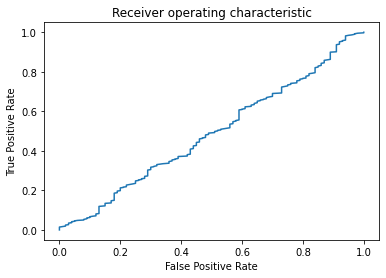

In [8]:
xyz=sorted(data_a.proba.unique().tolist(), reverse=True)
auc_score_a=auc(data_a,xyz)
print("AUC Score",auc_score_a)

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

### Data B

In [9]:
data_b['y_pred']=y_predict(data_b,'proba',0.5)

matrix_b=confusion_matrix(data_b)
print("Printing the confusion matrix:",matrix_b)

precision_b, recall_b, accuracy_score_b, F1_score_b=0,0,0,0

precision_b=matrix_b['tp']/(matrix_b['tp']+matrix_b['fp'])
print("Printing the precision",precision_b)

recall_b=matrix_b['tp']/(matrix_b['tp']+matrix_b['fn'])
print("Printing the recall", recall_b)

F1_score_b=2*precision_b*recall_b/(precision_b+recall_b)
print("Printing the F1 Score",F1_score_b)

accuracy_score_b=(matrix_b['tp']+matrix_b['tn'])/(matrix_b['tp']+matrix_b['tn']+matrix_b['fp']+matrix_b['fn'])
print("Printing the accuracy score",accuracy_score_b)

Printing the confusion matrix: {'tp': 55, 'tn': 9761, 'fn': 45, 'fp': 239}
Printing the precision 0.1870748299319728
Printing the recall 0.55
Printing the F1 Score 0.2791878172588833
Printing the accuracy score 0.9718811881188119


In [10]:
data_b.proba=data_b.proba.round(3)
xyz=sorted(data_b.proba.unique().tolist(), reverse=True)

100%|██████████| 446/446 [06:54<00:00,  1.08it/s]


AUC Score 0.937801


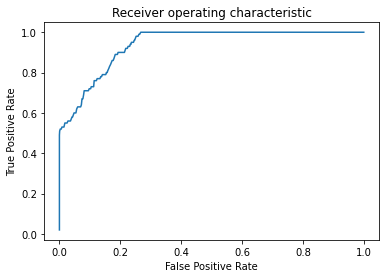

In [11]:
auc_score_b=auc(data_b,xyz)
print("AUC Score",auc_score_b)

### Data C

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [12]:
data_c=pd.read_csv(r"C:\Users\anshi\Downloads\5_c.csv")

data_c.rename(columns={'prob':'proba'}, inplace=True)
data_c=data_c.sort_values(by='proba')


In [13]:
def min_A(df):
    A_dict={}
    for i in (df['proba']):
        df['y_pred']=y_predict(df,df.proba, i)
        matrix_c=confusion_matrix(df)
        A_value=500*matrix_c['fn']+100*matrix_c['fp']
        A_dict[i]=A_value
        df.drop(columns=['y_pred'])
    return A_dict   


In [14]:
A_results=min_A(data_c)
A_value_final=min(A_results.values())
A_key_final=[x for x in A_results if A_results[x]==A_value_final]
print(A_value_final)
print(A_key_final)

141000
[0.2300390278970873]


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

### Data D

In [15]:
data_d=pd.read_csv(r"C:\Users\anshi\Downloads\5_d.csv")
data_d.columns

Index(['y', 'pred'], dtype='object')

In [16]:
def mean_error(df):
    difference=np.subtract(df.y, df.pred)
    squared=np.square(difference)
    mse=squared.mean()
    return mse


def mape(df):
    difference=abs(np.subtract(df.y, df.pred))
    x=(sum(difference))/(sum(df.y))
    return x

def rsquare(df):
    m=df.y.mean()
    difference=np.subtract(df.y, df.pred)
    squared=np.square(difference)
    difference_1=np.subtract(df.y, m)
    squared_1=np.square(difference_1)
    rsquare = 1-(sum(squared)/sum(squared_1))
    return rsquare

In [17]:
y=rsquare(data_d)
print(y)

0.9563582786990964


In [18]:
y=mape(data_d)
print(y)

0.1291202994009687


In [19]:
y=mean_error(data_d)
print(y)

177.16569974554707
